In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/archive/swiggy.csv")
df.head()


,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Address,Delivery time,Food type,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,5Th Block,59,Biryani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,5Th Block,56,Mughlai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Double Road,50,Chinese,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,80 Feet Road,57,North Indian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,80 Feet Road,63,Rajasthani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cleaned_data = df.drop(columns=[col for col in df.columns if "Unnamed" in col or col not in 
    ["Area", "City", "Restaurant", "Price", "Avg ratings", "Total ratings", "Delivery time", "Food type"]])
cleaned_data.info(), cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           8680 non-null   object 
 1   City           8680 non-null   object 
 2   Restaurant     8680 non-null   object 
 3   Price          8680 non-null   int64  
 4   Avg ratings    8680 non-null   float64
 5   Total ratings  8680 non-null   int64  
 6   Delivery time  8680 non-null   int64  
 7   Food type      8680 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 542.6+ KB


(None,
           Area       City         Restaurant  Price  Avg ratings  \
 0  Koramangala  Bangalore        Tandoor Hut    300          4.4   
 1  Koramangala  Bangalore      Tunday Kababi    300          4.1   
 2    Jogupalya  Bangalore            Kim Lee    650          4.4   
 3  Indiranagar  Bangalore  New Punjabi Hotel    250          3.9   
 4  Indiranagar  Bangalore                Nh8    350          4.0   
 
    Total ratings  Delivery time     Food type  
 0            100             59       Biryani  
 1            100             56       Mughlai  
 2            100             50       Chinese  
 3            500             57  North Indian  
 4             50             63    Rajasthani  )

C:\Users\hp\AppData\Local\Temp\ipykernel_29208\1496034905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_29208\1496034905.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.values, y=area_counts.index, palette="coolwarm")


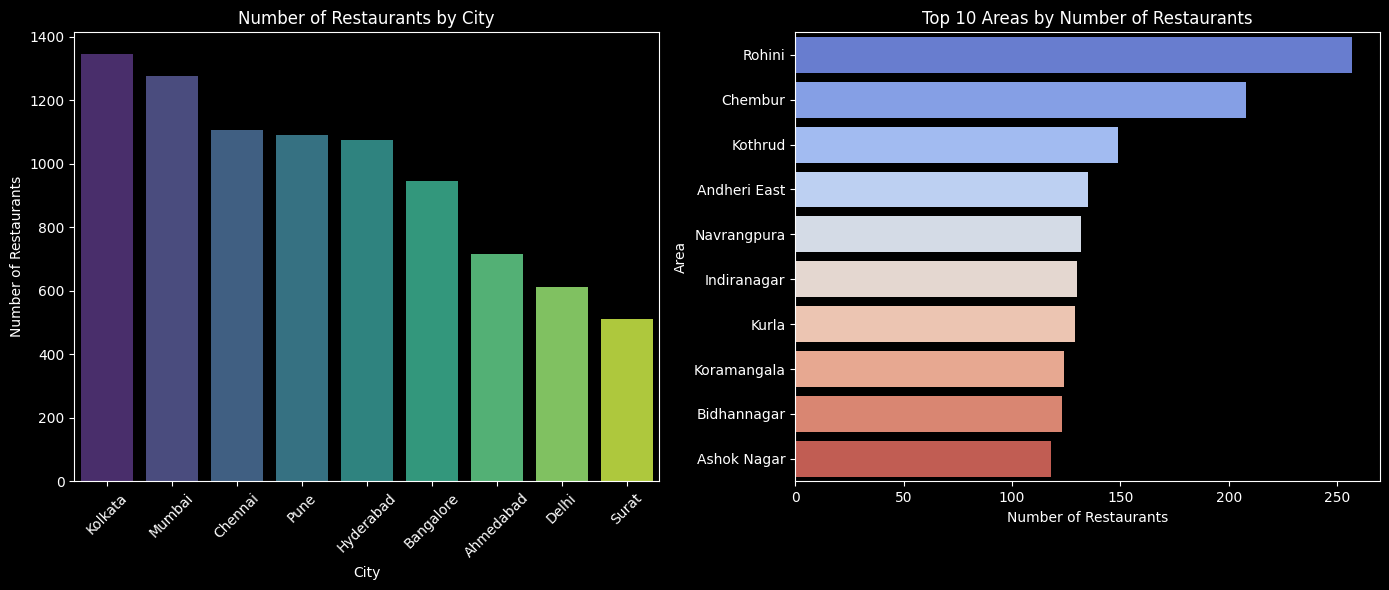

In [8]:
city_counts = cleaned_data["City"].value_counts()
area_counts = cleaned_data["Area"].value_counts().head(10) 

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title("Number of Restaurants by City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=area_counts.values, y=area_counts.index, palette="coolwarm")
plt.title("Top 10 Areas by Number of Restaurants")
plt.xlabel("Number of Restaurants")

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_29208\124215549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=food_type_counts.values, y=food_type_counts.index, palette="muted")


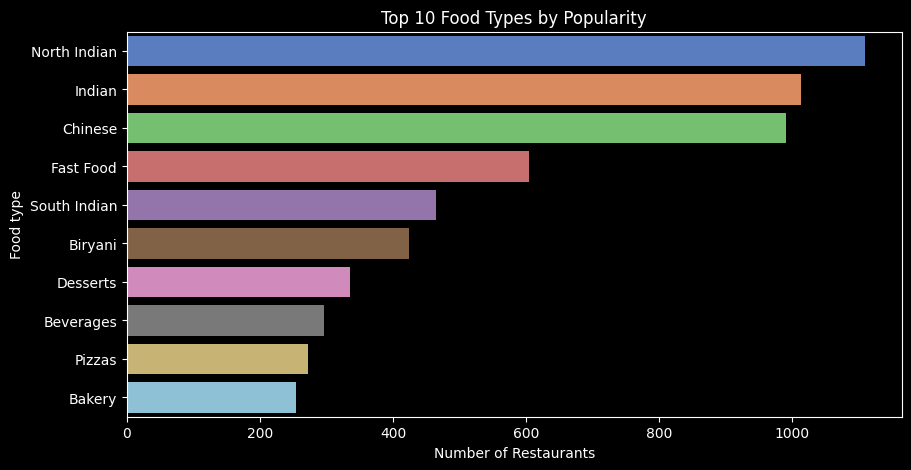

In [9]:
food_type_counts = cleaned_data["Food type"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=food_type_counts.values, y=food_type_counts.index, palette="muted")
plt.title("Top 10 Food Types by Popularity")
plt.xlabel("Number of Restaurants")
plt.show()

In [10]:
correlation = cleaned_data[["Price", "Avg ratings", "Delivery time"]].corr()
correlation

,Price,Avg ratings,Delivery time
Price,1.000000,0.113630,0.076009
Avg ratings,0.113630,1.000000,-0.146987
Delivery time,0.076009,-0.146987,1.000000


In [11]:
area_rating = cleaned_data.groupby("Area").agg({
    "Avg ratings": "mean",
    "Total ratings": "sum",
    "Price": "mean",
    "Restaurant": "count"  # Number of restaurants in the area
}).rename(columns={"Restaurant": "Number of Restaurants"}).sort_values(by="Avg ratings", ascending=False)

In [12]:
high_rating_areas = area_rating[area_rating["Number of Restaurants"] >= 10].head(10)


In [ ]:
food_type_pricing = cleaned_data.groupby("Food type").agg({
    "Price": "mean",
    "Avg ratings": "mean",
    "Total ratings": "sum"
}).sort_values(by="Total ratings", ascending=False).head(10)